<a href="https://colab.research.google.com/github/chacha86/BigData3/blob/colab/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B7%9C%EC%A0%9C_%EB%A6%BF%EC%A7%80%2C_%EB%9D%BC%EC%8F%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%95%EA%B7%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[19.4] 29.6
[26.6] 30.1
[17.98] 17.1


array([39.08])

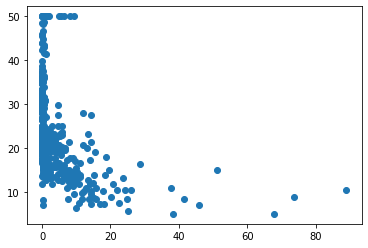

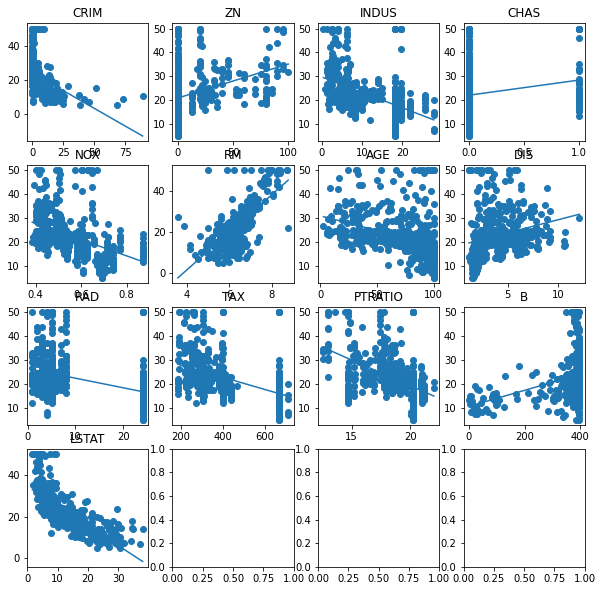

In [ ]:
from sklearn.datasets import load_boston
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore') # 경고무시

# 보스턴 집값 데이터 로드
bos = load_boston()

# 보스턴 집값의 독립변수 데이터 배열
data =  bos.data

# 보스턴 집값(종속변수)
target =  bos.target

# 특성 이름
feature_names = bos.feature_names

df = pd.DataFrame(data, columns=feature_names)

# CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
# NOX: 일산화질소 농도
# RM: 거주할 수 있는 방 개수
# AGE: 1940년 이전에 건축된 소유 주택의 비율
# DIS: 5개 주요 고용센터까지의 가중 거리
# RAD: 고속도로 접근 용이도
# TAX: 10,000달러당 재산세
# PTRATIO: 지역의 교사와 학생 수 비율
# B: 지역의 흑인 거주 비율
# LSTAT: 하위 계층의 비율

# 문제1 -> 가장 상관관계가 높은 특성을 찾아서 최근접 이웃 회귀로 성능지표를 확인하고 집값을 예측해주세요
# 시각화를 해주세요.
# 힌트1 . 상관관계가 높다라는 것은 기울기가 크다라는 뜻
# 힌트2 . 기울기를 직접 찾으려고 하면 안되고 모델에게 찾아달라고 해야함.
# 힌트3 . 반복문을 이용해 subplots을 이용해서 시각화

import matplotlib.pyplot as plt

plt.scatter(df['CRIM'], target)

from sklearn.linear_model import LinearRegression

# plt.subplots()

fig, axes = plt.subplots(4, 4, figsize = (10, 10))


# 주기 표현


coef_list = []

i = 0
for feature in df.columns.values :
  col = i % 4
  row = i // 4

  trd = df[[feature]].values

  lr = LinearRegression()
  lr.fit(trd, target)
  lr.coef_, lr.intercept_ # ax + b 
  
  coef_list.append(lr.coef_[0])

  x_min = np.min(trd)
  x_max = np.max(trd)

  def get_price(x) :
    return lr.coef_ * x + lr.intercept_

  y_min = get_price(x_min)
  y_max = get_price(x_max)

  axes[row, col].scatter(trd, target) 
  axes[row, col].plot([x_min, x_max], [y_min, y_max])
  axes[row, col].set_title(feature)
  i += 1

s = pd.Series(coef_list, index=df.columns)
s.sort_values(ascending=False)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(df['RM'], target, random_state=40)

trd = trd.values.reshape(-1, 1)
tsd = tsd.values.reshape(-1, 1)
knr = KNeighborsRegressor()
knr.fit(trd, trt)
knr.score(trd, trt), knr.score(tsd, tst)

print(knr.predict([trd[0]]), trt[0])
print(knr.predict([trd[7]]), trt[7])
print(knr.predict([trd[10]]), trt[10])

knr.predict([[400000000]])

# 특성이 하나면, 제곱, 세제곱, 네제곱......

# 문제2 -> 위에서 선택된 특성을 선형회귀 모델을 이용해 학습데이터 평가 점수 0.60, 테스트데이터 평가점수 0.55 이상으로 학습시켜주세요.
# 힌트1 . 피쳐 엔지니어링을 이용해 정확도 높이기
# 힌트2 . PolynomialFeatures 활용




In [ ]:
# 특성이 하나면, 제곱, 세제곱, 네제곱......

# 문제2 -> 위에서 선택된 특성을 선형회귀 모델을 이용해 학습데이터 평가 점수 0.60, 테스트데이터 평가점수 0.55 이상으로 학습시켜주세요.
# 힌트1 . 피쳐 엔지니어링을 이용해 정확도 높이기
# 힌트2 . PolynomialFeatures 활용

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(trd, trt)
lr.score(trd, trt), lr.score(tsd, tst)

# 과소적합 해소를 위해 
# 과대적합, 과소적합을 소하는 방법
# 과소적합 -> 특성(feature)를 추가하거나 ,회귀식의 0차수를 높인다.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias = False)  # 기본 차수 -> 2차

for i in range(1, 30) :
  poly.degree = i
  poly.fit(trd, trt)
  poly.get_feature_names_out()
  trd_poly = poly.transform(trd)
  tsd_poly = poly.transform(tsd)
  
  lr.fit(trd_poly, trt) # trt 
  if  lr.score(trd_poly, trt) >= 0.60 and lr.score(tsd_poly, tst) >= 0.55 :
    break

print(lr.score(trd_poly, trt), lr.score(tsd_poly, tst))

# 다항회귀 -> 특성을 늘리는 방식
trd, tsd, trt, tst = train_test_split(df, target, random_state=44)

poly.degree = 2 
poly.fit(trd, trt)
poly.get_feature_names_out()
trd_poly = poly.transform(trd)
tsd_poly = poly.transform(tsd)

lr.fit(trd_poly, trt)
lr.score(trd_poly, trt), lr.score(tsd_poly, tst)

# 학습 정확도 0.85 이상 테스트 정확도 0.80 이상으로 학습해주세요.





0.603675495284766 0.583624639681003


(0.939330150017332, 0.783184313814802)

In [71]:
# 특성을 선별해서 feature 엔지니어링을 통해 좀 더 디테일하게 학습 시킨다.

coef_list = []

for feature in df.columns.values :

  trd = df[[feature]].values

  lr = LinearRegression()
  lr.fit(trd, target)
  lr.coef_, lr.intercept_ # ax + b 
  
  coef_list.append(lr.coef_[0])

s = pd.Series(coef_list, index=df.columns)

s = pd.Series.abs(s)

s = s.sort_values(ascending=False)

cols = s.index.values[:6] # 상관도가 높은 6개의 특성을 선별하여 진행
df2 = df[cols]

trd, tsd, trt, tst = train_test_split(df2, target, random_state=44)

poly.degree = 5
poly.fit(trd, trt)
poly.get_feature_names_out()
trd_poly = poly.transform(trd)
tsd_poly = poly.transform(tsd)

lr.fit(trd_poly, trt)
lr.score(trd_poly, trt), lr.score(tsd_poly, tst) # 차수 2에서 학습 0.86, 테스트 0.84 정도의 정확도를 갖는다.

# 차수 3으로 올리면 학습 0.90, 테스트 0.79로 과대적합 되는데 이를 규제를 통해 해소할 수 있다.

# 과대적합 -> 해소 (규제)
# 규제는 규제파라미터 alpha를 이용해 기울기 값을 감소시켜 과대적합을 해소하는 방식.
# 원래의 오차합에 alpha값을 이용해 오차값을 늘려 과대적합을 해소하는 방식. alpha값이 커질수록 기울기 값은 감소한다.

# 회귀의 규제 방법은 크게 두개로 나뉜다.
# 릿지 -> 기울기를 감소기키기 
# 라쏘 -> 영향도 낮은 기울기를 0처리(특성의 개수를 줄여주는 역할)

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.alpha = 100000000
ridge.fit(trd_poly, trt)
print(ridge.score(trd_poly, trt), ridge.score(tsd_poly, tst))


0.8821521105437432 0.8437037462958552


In [86]:
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
ss.fit(trd_poly)
trd_s = ss.transform(trd_poly)
tsd_s = ss.transform(tsd_poly)

lasso = Lasso()
lasso.alpha = 0.01
lasso.fit(trd_s, trt)
print(lasso.score(trd_s, trt), lasso.score(tsd_s, tst)) # 학습 평가
print(lasso.predict(tsd_s[:10]), tst[:10]) # 10개 데이터에 대한 예측 결과 테스트

0.8880451241495566 0.8610674063686832
[17.80552991 19.17209347 19.97733012 36.53327397 18.79006656 34.79123798
 18.45738823 21.31430367 26.93362037 26.48005192] [17.8 21.5 21.2 32.4 10.9 31.7 21.4 24.3 29.1 25. ]
